# 1. Reading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Reading Dataset

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

# 3. EDA

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#checking missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

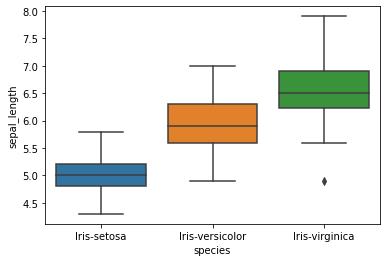

In [11]:
sns.boxplot(x='species', y = 'sepal_length', data = df)
plt.show()

One outlier for iris-verginica category

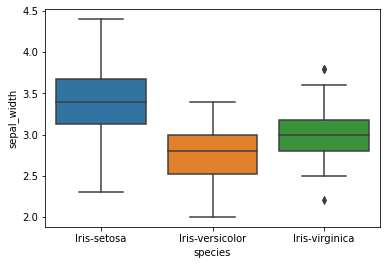

In [12]:
sns.boxplot(x='species', y = 'sepal_width', data = df)
plt.show()

some outlier for iris-verginica category

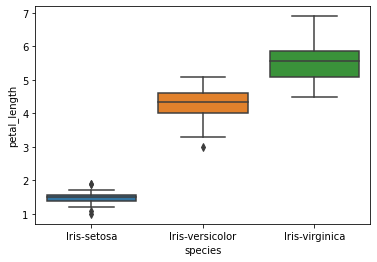

In [13]:
sns.boxplot(x='species', y = 'petal_length', data = df)
plt.show()

outliers in iris-setosa and iris-versicolor species

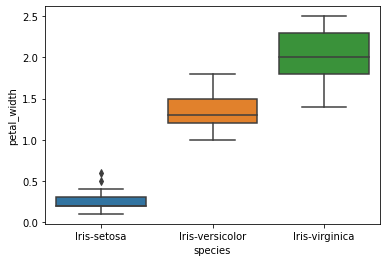

In [14]:
sns.boxplot(x='species', y = 'petal_width', data = df)
plt.show()

outlier in iris-setosa species

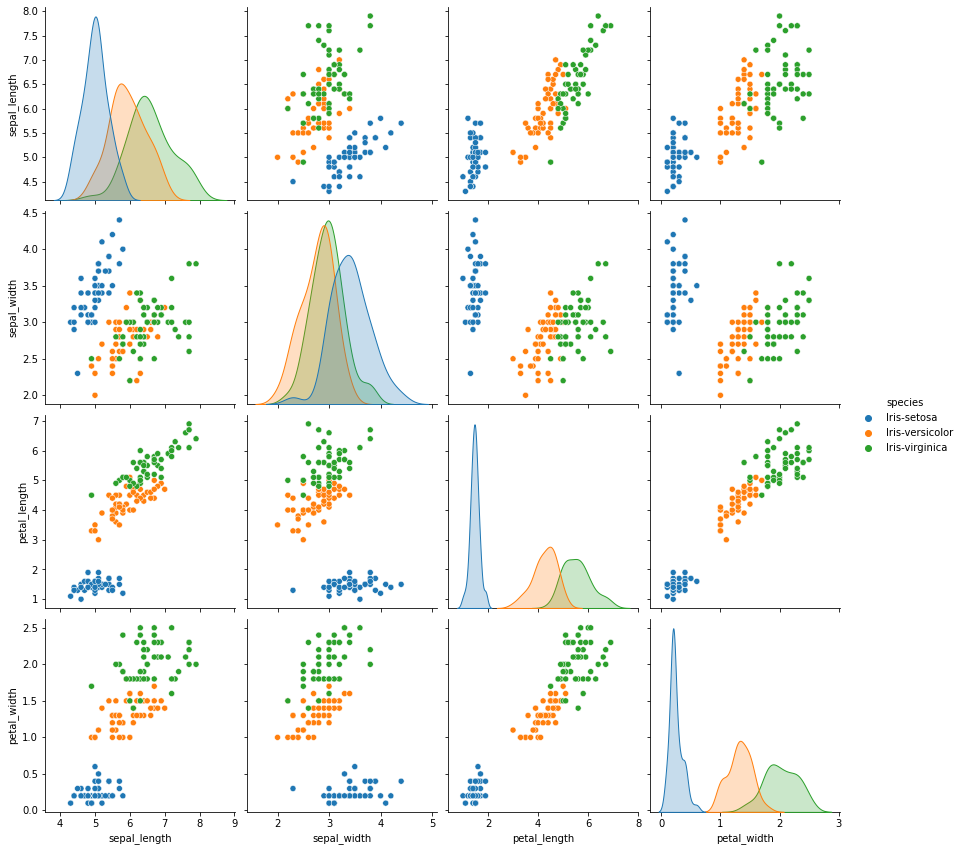

In [15]:
sns.pairplot(df,hue="species",size=3)
plt.show()

In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


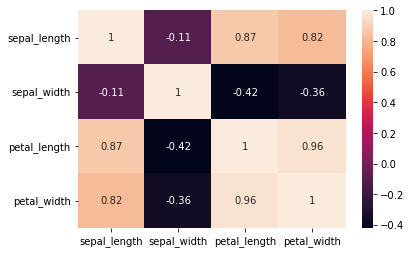

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# 4. Data Preprocessing

In [18]:
#divide data into dependent and independent variable
X = df.drop('species', axis=1)
y=df['species']

In [19]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [23]:
print('The shape of X_train is: {}'.format(X_train.shape))
print('The shape of X_test is: {}'.format(X_test.shape))
print('The shape of y_train is: {}'.format(y_train.shape))
print('The shape of y_test is: {}'.format(y_test.shape))

The shape of X_train is: (120, 4)
The shape of X_test is: (30, 4)
The shape of y_train is: (120,)
The shape of y_test is: (30,)


In [24]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 5. Model Building

### 5.1 Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
pred_train = model.predict(X_train)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.92      0.95        38
           2       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
Accuracy Score of Model on train data is: 0.9666666666666667


In [29]:
pred_test = model.predict(X_test)

In [30]:
# Summary of the predictions made by the classifier
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
Accuracy Score of Model on test data is: 0.9666666666666667


In [31]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = model,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(X_train, y_train)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_  
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Best Accuracy of LR: 96.67 %
Best Parameter of LR: {'C': 10, 'penalty': 'l2'}


### 5.2 K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [33]:
pred_train=model.predict(X_train)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.88      1.00      0.94        38
           2       1.00      0.88      0.94        42

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

[[40  0  0]
 [ 0 38  0]
 [ 0  5 37]]
Accuracy Score of Model on train data is: 0.9583333333333334


In [35]:
pred_test=model.predict(X_test)

In [36]:
# Summary of the predictions made by the classifier
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
Accuracy Score of Model on test data is: 1.0


Minimum error:- 0.0 at K = 6


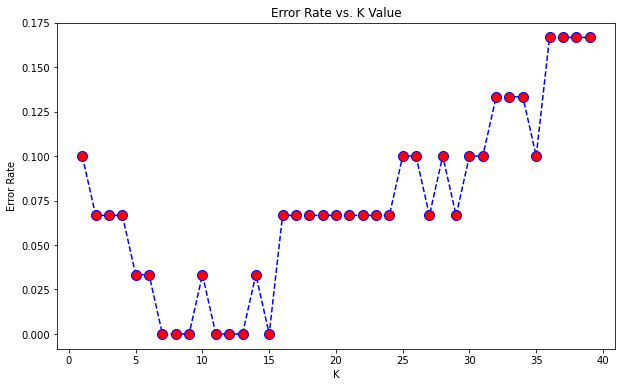

In [37]:
#Determining value of k
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 1.0 at K = 6


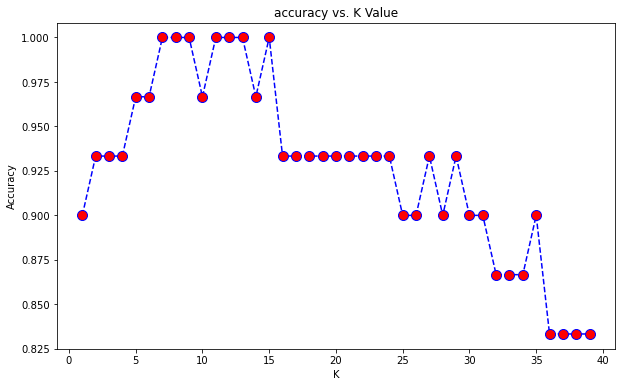

In [38]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

### 5.3 Gaussian Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [40]:
pred_train = model.predict(X_train)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.92      0.95      0.94        38
           2       0.95      0.93      0.94        42

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

[[40  0  0]
 [ 0 36  2]
 [ 0  3 39]]
Accuracy Score of Model on train data is: 0.9583333333333334


In [42]:
pred_test = model.predict(X_test)

In [43]:
# Summary of the predictions made by the classifier
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
Accuracy Score of Model on test data is: 0.9666666666666667


### 5.4 Bernoulli Naive Bayes

In [44]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train,y_train)

BernoulliNB()

In [45]:
pred_train = model.predict(X_train)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       0.74      0.37      0.49        38
           2       0.66      0.88      0.76        42

    accuracy                           0.76       120
   macro avg       0.76      0.75      0.73       120
weighted avg       0.76      0.76      0.73       120

[[40  0  0]
 [ 5 14 19]
 [ 0  5 37]]
Accuracy Score of Model on train data is: 0.7583333333333333


In [47]:
pred_test = model.predict(X_test)

In [48]:
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.83      0.42      0.56        12
           2       0.58      0.88      0.70         8

    accuracy                           0.73        30
   macro avg       0.75      0.76      0.72        30
weighted avg       0.77      0.73      0.71        30

[[10  0  0]
 [ 2  5  5]
 [ 0  1  7]]
Accuracy Score of Model on test data is: 0.7333333333333333


### 5.5 Support Vector Machine

In [50]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [51]:
pred_train=model.predict(X_train)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.97      0.97        38
           2       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
Accuracy Score of Model on train data is: 0.9833333333333333


In [53]:
pred_test= model.predict(X_test)

In [54]:
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))


              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00         8

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[ 9  1  0]
 [ 0 12  0]
 [ 0  0  8]]
Accuracy Score of Model on test data is: 0.9666666666666667


### 5.6 Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
pred_train=model.predict(X_train)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[40  0  0]
 [ 0 38  0]
 [ 0  0 42]]
Accuracy Score of Model on train data is: 1.0


In [58]:
pred_test=model.predict(X_test)

In [59]:
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
Accuracy Score of Model on test data is: 0.9666666666666667


### 5.7 Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
pred_train=model.predict(X_train)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[40  0  0]
 [ 0 38  0]
 [ 0  0 42]]
Accuracy Score of Model on train data is: 1.0


In [64]:
pred_test=model.predict(X_test)

In [65]:
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      1.00      0.92        12
           2       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30

[[10  0  0]
 [ 0 12  0]
 [ 0  2  6]]
Accuracy Score of Model on test data is: 0.9333333333333333


### 5.8 ExtraTreeClassifier

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [67]:
pred_train=model.predict(X_train)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[40  0  0]
 [ 0 38  0]
 [ 0  0 42]]
Accuracy Score of Model on train data is: 1.0


In [69]:
pred_test=model.predict(X_test)

In [70]:
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
Accuracy Score of Model on test data is: 1.0


### 5.9 Bagging Classifier

In [71]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier()
model.fit(X_train,y_train)

BaggingClassifier()

In [72]:
pred_train=model.predict(X_train)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[40  0  0]
 [ 0 38  0]
 [ 0  0 42]]
Accuracy Score of Model on train data is: 1.0


In [74]:
pred_test=model.predict(X_test)

In [75]:
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
Accuracy Score of Model on test data is: 0.9666666666666667


### 5.10 AdaBoost Classifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_train,y_train)

AdaBoostClassifier()

In [77]:
pred_train=model.predict(X_train)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.55      1.00      0.71        38
           2       1.00      0.26      0.42        42

    accuracy                           0.74       120
   macro avg       0.85      0.75      0.71       120
weighted avg       0.86      0.74      0.70       120

[[40  0  0]
 [ 0 38  0]
 [ 0 31 11]]
Accuracy Score of Model on train data is: 0.7416666666666667


In [79]:
pred_test=model.predict(X_test)

In [80]:
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      1.00      0.86        12
           2       1.00      0.50      0.67         8

    accuracy                           0.87        30
   macro avg       0.92      0.83      0.84        30
weighted avg       0.90      0.87      0.85        30

[[10  0  0]
 [ 0 12  0]
 [ 0  4  4]]
Accuracy Score of Model on test data is: 0.8666666666666667


### 5.11 Gradient Boosting Classifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [82]:
pred_train=model.predict(X_train)

In [83]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[40  0  0]
 [ 0 38  0]
 [ 0  0 42]]
Accuracy Score of Model on train data is: 1.0


In [84]:
pred_test=model.predict(X_test)

In [85]:
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

# Accuracy score
print('Accuracy Score of Model on test data is: {}' .format(accuracy_score(y_test,pred_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
Accuracy Score of Model on test data is: 0.9666666666666667
